In [23]:
import pandas as pd
from langchain_core.documents import Document
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

In [2]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

In [3]:
import sys

# Add the current folder to sys.path
sys.path.append(os.path.abspath(''))

INITIALIZE LLM

In [4]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4")

SIMULATION OF USERS DATASET

In [5]:
data = {
    "Nom Prénom": ["Martin Dupont", "Lucie Mercier", "Thomas Léger", "Sophie Bernard", "Rémi Fontaine", 
                   "Émilie Rousseau", "Paul Moreau", "Nadia Petit", "Julien Fournier", "Marie-Claire Dubois"],
    "Âge": [34, 29, 42, 36, 27, 31, 39, 45, 22, 38],
    "Post": [
        "Je m'appelle Martin Dupont, 34 ans. Après avoir perdu mon emploi l'année dernière, j'ai traversé une période de dépression sévère. Je me sentais vide et isolé, sans plaisir dans mes activités habituelles. Grâce à une thérapie et au soutien de mes proches, je me sens désormais guéri et j'ai retrouvé un travail qui me plaît.",
        "Je suis Lucie Mercier, 29 ans. Durant mes études universitaires, j'ai lutté contre l'anxiété et la dépression, avec des nuits blanches et des crises d'angoisse. Aujourd'hui, grâce à un suivi psychologique, je me considère guérie et je suis beaucoup plus heureuse et stable.",
        "Thomas Léger ici, 42 ans. La séparation avec mon partenaire a été un déclencheur de dépression pour moi. Je ressens encore une grande tristesse et un manque d'énergie, affectant mon quotidien. Je travaille toujours sur moi-même avec l'aide d'un thérapeute.",
        "Je m'appelle Sophie Bernard, 36 ans, et j'ai combattu une dépression post-partum. Je me sentais comme une mauvaise mère, épuisée et incompétente. Aujourd'hui, guérie grâce à l'aide professionnelle, je profite pleinement de la maternité.",
        "Je suis Rémi Fontaine, 27 ans. Mes troubles anxieux culminaient en crises de panique qui m'empêchaient de sortir de chez moi. Avec une thérapie comportementale, je suis guéri et je gère bien mon anxiété maintenant.",
        "Émilie Rousseau, 31 ans. J'ai affronté une dépression due au stress au travail. Après avoir changé de travail et suivi des séances de relaxation, je me sens guérie et bien plus équilibrée.",
        "Paul Moreau, 39 ans. J'ai subi un stress intense conduisant à des symptômes dépressifs. Bien que je ne sois pas encore guéri, j'ai commencé un traitement et je me sens mieux petit à petit.",
        "Nadia Petit, 45 ans. Je vis avec une dépression chronique, avec des hauts et des bas constants. Je ne suis pas encore guérie, mais j'ai trouvé des stratégies pour maintenir un équilibre.",
        "Julien Fournier, 22 ans. J'ai souffert de dépression durant mon adolescence, me sentant souvent seul et incompris. Grâce à un groupe de soutien, je me sens guéri et plus ouvert aux autres.",
        "Marie-Claire Dubois, 38 ans. Licenciée il y a un an, j'ai traversé une grave dépression. Maintenant guérie, j'ai repris des études et adopté un style de vie plus sain."
    ]
}

df = pd.DataFrame(data)

In [6]:
df

,Nom Prénom,Âge,Post
0,Martin Dupont,34,"Je m'appelle Martin Dupont, 34 ans. Après avoi..."
1,Lucie Mercier,29,"Je suis Lucie Mercier, 29 ans. Durant mes étud..."
2,Thomas Léger,42,"Thomas Léger ici, 42 ans. La séparation avec m..."
3,Sophie Bernard,36,"Je m'appelle Sophie Bernard, 36 ans, et j'ai c..."
4,Rémi Fontaine,27,"Je suis Rémi Fontaine, 27 ans. Mes troubles an..."
5,Émilie Rousseau,31,"Émilie Rousseau, 31 ans. J'ai affronté une dép..."
6,Paul Moreau,39,"Paul Moreau, 39 ans. J'ai subi un stress inten..."
7,Nadia Petit,45,"Nadia Petit, 45 ans. Je vis avec une dépressio..."
8,Julien Fournier,22,"Julien Fournier, 22 ans. J'ai souffert de dépr..."
9,Marie-Claire Dubois,38,"Marie-Claire Dubois, 38 ans. Licenciée il y a ..."


SIMULATE CONCATENATION OF USER'S POSTS BY CREATING DOCUMENTS

In [7]:
docs = []
for i in range(len(df)):
    
    post = df["Post"][i]
    user_id = "user_" + str(i+1)
    username = df["Nom Prénom"][i]
    age = df["Âge"][i]
    document = Document(page_content= post, metadata= {"user_id": user_id, "username": username, "age": age})
    docs.append(document)

In [8]:
docs

[Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="Je m'appelle Martin Dupont, 34 ans. Après avoir perdu mon emploi l'année dernière, j'ai traversé une période de dépression sévère. Je me sentais vide et isolé, sans plaisir dans mes activités habituelles. Grâce à une thérapie et au soutien de mes proches, je me sens désormais guéri et j'ai retrouvé un travail qui me plaît."),
 Document(metadata={'user_id': 'user_2', 'username': 'Lucie Mercier', 'age': 29}, page_content="Je suis Lucie Mercier, 29 ans. Durant mes études universitaires, j'ai lutté contre l'anxiété et la dépression, avec des nuits blanches et des crises d'angoisse. Aujourd'hui, grâce à un suivi psychologique, je me considère guérie et je suis beaucoup plus heureuse et stable."),
 Document(metadata={'user_id': 'user_3', 'username': 'Thomas Léger', 'age': 42}, page_content="Thomas Léger ici, 42 ans. La séparation avec mon partenaire a été un déclencheur de dépression pour moi. Je 

SPLITTING EACH DOCS

In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 20,
    length_function = len
)

split_docs = splitter.split_documents(docs)
split_docs

[Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="Je m'appelle Martin Dupont, 34 ans. Après avoir perdu mon emploi l'année dernière, j'ai traversé une"),
 Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="j'ai traversé une période de dépression sévère. Je me sentais vide et isolé, sans plaisir dans mes"),
 Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content='plaisir dans mes activités habituelles. Grâce à une thérapie et au soutien de mes proches, je me'),
 Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="mes proches, je me sens désormais guéri et j'ai retrouvé un travail qui me plaît."),
 Document(metadata={'user_id': 'user_2', 'username': 'Lucie Mercier', 'age': 29}, page_content="Je suis Lucie Mercier, 29 ans. Durant mes études universitaires, j'ai lutté contre l'anxiété et la"),
 Document(metadata={'user_i

In [10]:
from collections import defaultdict

grouped_chunks = defaultdict(list)
for chunk in split_docs:
    user_id = chunk.metadata["user_id"]
    grouped_chunks[user_id].append(chunk)

user_list_doc = list(grouped_chunks.values())

In [11]:
user_list_doc

[[Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="Je m'appelle Martin Dupont, 34 ans. Après avoir perdu mon emploi l'année dernière, j'ai traversé une"),
  Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="j'ai traversé une période de dépression sévère. Je me sentais vide et isolé, sans plaisir dans mes"),
  Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content='plaisir dans mes activités habituelles. Grâce à une thérapie et au soutien de mes proches, je me'),
  Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="mes proches, je me sens désormais guéri et j'ai retrouvé un travail qui me plaît.")],
 [Document(metadata={'user_id': 'user_2', 'username': 'Lucie Mercier', 'age': 29}, page_content="Je suis Lucie Mercier, 29 ans. Durant mes études universitaires, j'ai lutté contre l'anxiété et la"),
  Document(metadata={

In [12]:
df["split_docs"] = user_list_doc


In [13]:
df["split_docs"][0]

[Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="Je m'appelle Martin Dupont, 34 ans. Après avoir perdu mon emploi l'année dernière, j'ai traversé une"),
 Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="j'ai traversé une période de dépression sévère. Je me sentais vide et isolé, sans plaisir dans mes"),
 Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content='plaisir dans mes activités habituelles. Grâce à une thérapie et au soutien de mes proches, je me'),
 Document(metadata={'user_id': 'user_1', 'username': 'Martin Dupont', 'age': 34}, page_content="mes proches, je me sens désormais guéri et j'ai retrouvé un travail qui me plaît.")]

In [14]:
from graph_user_recommand_profile import create_app

app = create_app()

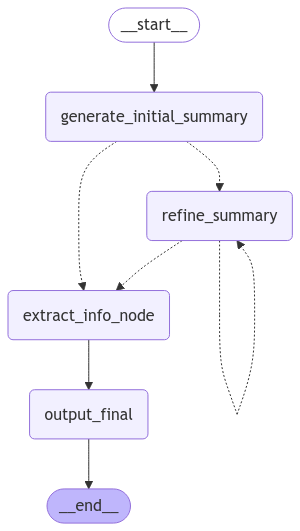

In [15]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

GENERATE PROFILE

In [16]:
all_profile = []
all_mental_bool = []
all_cured_bool = []

for i in range(len(df)):
    documents = df["split_docs"][i]  
    state = await app.ainvoke({"contents": [doc.page_content for doc in documents], "extra_args": {"llm": llm}})
    profile_description_mental_health = state["output_dict"]["bad_mental_health_profile"]
    bool_mental_health = state["output_dict"]["is_badmental_health"]
    bool_mental_cured = state["output_dict"]["Is_mentally_cured"]
    all_profile.append(profile_description_mental_health)
    all_mental_bool.append(bool_mental_health)
    all_cured_bool.append(bool_mental_cured)

In [17]:
df["profile_mental_health"] = all_profile
df["bool_mental_health"] = all_mental_bool
df["bool_mental_cured"] = all_cured_bool

In [18]:
df

,Nom Prénom,Âge,Post,split_docs,profile_mental_health,bool_mental_health,bool_mental_cured
0,Martin Dupont,34,"Je m'appelle Martin Dupont, 34 ans. Après avoi...","[page_content='Je m'appelle Martin Dupont, 34 ...",After a challenging period of unemployment and...,True,True
1,Lucie Mercier,29,"Je suis Lucie Mercier, 29 ans. Durant mes étud...","[page_content='Je suis Lucie Mercier, 29 ans. ...","Lucie Mercier, 29, shares her struggle with an...",True,True
2,Thomas Léger,42,"Thomas Léger ici, 42 ans. La séparation avec m...","[page_content='Thomas Léger ici, 42 ans. La sé...","Thomas Léger, 42 years old, states that his se...",True,False
3,Sophie Bernard,36,"Je m'appelle Sophie Bernard, 36 ans, et j'ai c...","[page_content='Je m'appelle Sophie Bernard, 36...","Sophie Bernard, a 36-year-old mother, had a ba...",True,True
4,Rémi Fontaine,27,"Je suis Rémi Fontaine, 27 ans. Mes troubles an...","[page_content='Je suis Rémi Fontaine, 27 ans. ...","Rémi Fontaine, 27, who previously suffered fro...",True,True
5,Émilie Rousseau,31,"Émilie Rousseau, 31 ans. J'ai affronté une dép...","[page_content='Émilie Rousseau, 31 ans. J'ai a...",Émilie Rousseau had work-induced depression,True,True
6,Paul Moreau,39,"Paul Moreau, 39 ans. J'ai subi un stress inten...","[page_content='Paul Moreau, 39 ans. J'ai subi ...","Paul Moreau, a 39-year-old, has experienced in...",True,False
7,Nadia Petit,45,"Nadia Petit, 45 ans. Je vis avec une dépressio...","[page_content='Nadia Petit, 45 ans. Je vis ave...","Nadia Petit, 45, lives with chronic depression...",True,False
8,Julien Fournier,22,"Julien Fournier, 22 ans. J'ai souffert de dépr...","[page_content='Julien Fournier, 22 ans. J'ai s...",Julien Fournier battled depression and feeling...,True,True
9,Marie-Claire Dubois,38,"Marie-Claire Dubois, 38 ans. Licenciée il y a ...","[page_content='Marie-Claire Dubois, 38 ans. Li...","Marie-Claire Dubois, 38, who was laid off a ye...",True,False


In [21]:
doc_vectorstore_profile_mental_health = []

for i in range(len(df)):
    doc = Document(page_content=df["profile_mental_health"][i], 
                   metadata={"user_id": i+1, "username": df["Nom Prénom"][i], 
                             "bool_mental_cured": df["bool_mental_cured"][i], "bool_mental_health": df["bool_mental_health"][i]})
    
    doc_vectorstore_profile_mental_health.append(doc)

In [22]:
doc_vectorstore_profile_mental_health

[Document(metadata={'user_id': 1, 'username': 'Martin Dupont', 'bool_mental_cured': 'True', 'bool_mental_health': 'True'}, page_content='After a challenging period of unemployment and severe depression, 34-year-old Martin Dupont has successfully overcome his struggles with the help of therapy and support from his loved ones.'),
 Document(metadata={'user_id': 2, 'username': 'Lucie Mercier', 'bool_mental_cured': 'True', 'bool_mental_health': 'True'}, page_content='Lucie Mercier, 29, shares her struggle with anxiety and depression, which included sleepless nights and panic attacks, during her university studies.'),
 Document(metadata={'user_id': 3, 'username': 'Thomas Léger', 'bool_mental_cured': 'False', 'bool_mental_health': 'True'}, page_content='Thomas Léger, 42 years old, states that his separation from his partner triggered his depression. His condition, characterized by a deep sadness and lack of energy, affects his daily life.'),
 Document(metadata={'user_id': 4, 'username': 'Soph

## VECTORSTORE

In [26]:
embeddings = OpenAIEmbeddings()

vectorstore = Chroma.from_documents(doc_vectorstore_profile_mental_health, embeddings)

FIND SIMILAR PROFILE

In [27]:
similarity_profile_docs = []

for i in range(len(df)):
    current_user_id = i+1
    query = df["profile_mental_health"][i]
    filter_query = {
        "$and": [
            {"bool_mental_cured": {"$eq": "True"}},
            {"user_id": {"$ne": current_user_id}}
        ]
    }
    docs = vectorstore.similarity_search(query = query,
                                filter = filter_query)
    similarity_profile_docs.append(docs)

df["similar_profile"] = similarity_profile_docs

In [30]:
df

,Nom Prénom,Âge,Post,split_docs,profile_mental_health,bool_mental_health,bool_mental_cured,similar_profile
0,Martin Dupont,34,"Je m'appelle Martin Dupont, 34 ans. Après avoi...","[page_content='Je m'appelle Martin Dupont, 34 ...",After a challenging period of unemployment and...,True,True,"[page_content='Lucie Mercier, 29, shares her s..."
1,Lucie Mercier,29,"Je suis Lucie Mercier, 29 ans. Durant mes étud...","[page_content='Je suis Lucie Mercier, 29 ans. ...","Lucie Mercier, 29, shares her struggle with an...",True,True,"[page_content='Rémi Fontaine, 27, who previous..."
2,Thomas Léger,42,"Thomas Léger ici, 42 ans. La séparation avec m...","[page_content='Thomas Léger ici, 42 ans. La sé...","Thomas Léger, 42 years old, states that his se...",True,False,[page_content='After a challenging period of u...
3,Sophie Bernard,36,"Je m'appelle Sophie Bernard, 36 ans, et j'ai c...","[page_content='Je m'appelle Sophie Bernard, 36...","Sophie Bernard, a 36-year-old mother, had a ba...",True,True,"[page_content='Lucie Mercier, 29, shares her s..."
4,Rémi Fontaine,27,"Je suis Rémi Fontaine, 27 ans. Mes troubles an...","[page_content='Je suis Rémi Fontaine, 27 ans. ...","Rémi Fontaine, 27, who previously suffered fro...",True,True,"[page_content='Lucie Mercier, 29, shares her s..."
5,Émilie Rousseau,31,"Émilie Rousseau, 31 ans. J'ai affronté une dép...","[page_content='Émilie Rousseau, 31 ans. J'ai a...",Émilie Rousseau had work-induced depression,True,True,"[page_content='Lucie Mercier, 29, shares her s..."
6,Paul Moreau,39,"Paul Moreau, 39 ans. J'ai subi un stress inten...","[page_content='Paul Moreau, 39 ans. J'ai subi ...","Paul Moreau, a 39-year-old, has experienced in...",True,False,[page_content='After a challenging period of u...
7,Nadia Petit,45,"Nadia Petit, 45 ans. Je vis avec une dépressio...","[page_content='Nadia Petit, 45 ans. Je vis ave...","Nadia Petit, 45, lives with chronic depression...",True,False,"[page_content='Lucie Mercier, 29, shares her s..."
8,Julien Fournier,22,"Julien Fournier, 22 ans. J'ai souffert de dépr...","[page_content='Julien Fournier, 22 ans. J'ai s...",Julien Fournier battled depression and feeling...,True,True,"[page_content='Rémi Fontaine, 27, who previous..."
9,Marie-Claire Dubois,38,"Marie-Claire Dubois, 38 ans. Licenciée il y a ...","[page_content='Marie-Claire Dubois, 38 ans. Li...","Marie-Claire Dubois, 38, who was laid off a ye...",True,False,[page_content='Émilie Rousseau had work-induce...


PRINT SIMILAR PROFILE FOR EACH USERS

In [41]:
for i in range(len(df)):

    print("user_id for the user:", i+1)
    print("user's username:", df["Nom Prénom"][i])
    print("\n")
    print("Here is relevant profiles that were also in bad mental health but have overcome all their difficulties, contact them if you want some advice ^^:")
    for doc in df["similar_profile"][i]:
        print(doc.metadata["username"])
    print("\n")
    print("-------------------------------------------------------------------------------------------------------------------")

user_id for the user: 1
user's username: Martin Dupont


Here is relevant profiles that were also in bad mental health but have overcome all their difficulties, contact them if you want some advice ^^:
Lucie Mercier
Rémi Fontaine
Julien Fournier
Émilie Rousseau


-------------------------------------------------------------------------------------------------------------------
user_id for the user: 2
user's username: Lucie Mercier


Here is relevant profiles that were also in bad mental health but have overcome all their difficulties, contact them if you want some advice ^^:
Rémi Fontaine
Émilie Rousseau
Sophie Bernard
Julien Fournier


-------------------------------------------------------------------------------------------------------------------
user_id for the user: 3
user's username: Thomas Léger


Here is relevant profiles that were also in bad mental health but have overcome all their difficulties, contact them if you want some advice ^^:
Martin Dupont
Lucie Mercier
Émilie Rou